In [17]:
using Plots, Distributions, Roots, StatsBase

# Class Notebook
DATA 1010: Day 15  
Empirical CDF convergence and Bootstrapping  
Brown University  
16 October 2020  

**Exercise 1**.

What's the main difficulty with being able to say that the empirical measure and the original measure $\nu$ are close?

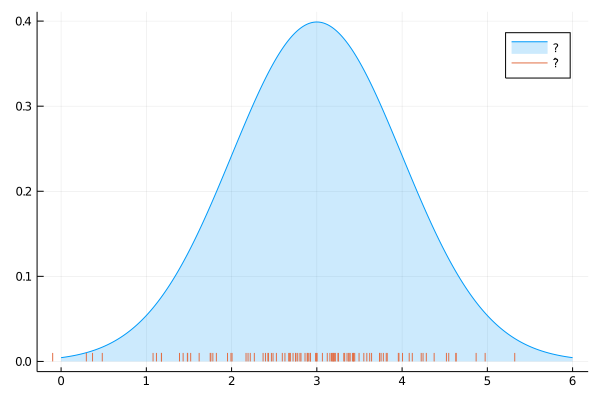

In [18]:
ν = Normal(3, 1)
x = rand(ν, 100)
plot(0:0.01:6, x -> pdf(ν, x), label = "ν", fillrange = 0, fillopacity = 0.2)
sticks!(x, x -> 0.01, label = "ν̂")

**Exercise 2**.

Let's play a game. I'm going to give you a bunch of observations I sampled from a particular distribution. I want you to plot a CDF which is close to the CDF of the distribution I used to generate the observations. 

In [19]:
observations = [2.52, 2.363, -1.42, -0.141, 3.073, -0.857, 3.46, 3.155, -0.291, 2.818, 1.346, 1.153, 1.175, -0.585, 2.279, 3.412, 2.719, 2.957, 2.565, 3.195, 2.441, 2.94, 2.758, 2.447, 3.107, 1.801, 2.559, 3.611, 3.146, 2.213, -2.614, 2.432, 3.088, 3.014, 0.245, -0.93, 2.605, 2.624, 3.479, 1.168, 3.084, 2.696, 2.34, 2.478, 2.903, 2.047, -0.159, -0.06, 2.434, 3.289, 1.92, -0.654, 0.242, 0.601, 3.262, 3.484, 3.783, 2.951, 2.448, -0.078, -0.377, 2.964, -0.735, 2.259, 3.144, -0.491, 3.242, 2.465, 3.503, 2.875, 2.604, 1.923, 2.209, 3.014, 2.858, 3.549, -1.034, -0.238, 3.137, 3.053, 3.859, -0.216, 2.562, 2.983, 3.472, 2.25, 3.856, 3.3, 4.579, 2.518, 2.992, 3.79, 3.646, 1.396, -0.883, 2.916, -0.07, 3.102, 3.873, 3.32];

**Exercise 3**.

What might be a good way to get an estimate of the _P_DF, given that we can estimate the CDF reasonably via the empirical CDF?

**Exercise 4**.

We can say that, with respect to the $L^\infty$ distance, the function closest to $f$ is [g|h].

<center><img src="L-infinity-e02be0a9-e97d-45c2-bc1a-23f4ed21d34a.svg"></img></center>

**Exercise 5**.
Run the code below 20 times, and send a message indicating how many of those times you saw the empirical CDF falling outside of the band anywhere.

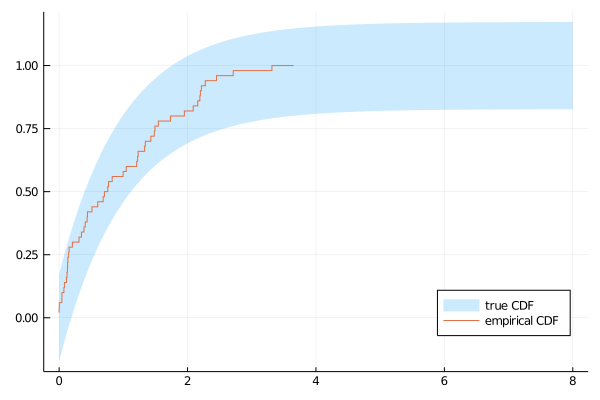

In [20]:
n = 50
ϵ = find_zero(ϵ -> 2exp(-2n*ϵ^2) - 0.1, 0.05)
xs = range(0, 8, length=100)
plot(xs, x-> 1-exp(-x) + ϵ, fillrange = x-> 1-exp(-x) - ϵ,
   label = "true CDF", legend = :bottomright,
   fillalpha = 0.2, linewidth = 0)
plot!(sort(rand(Exponential(1),n)), (1:n)/n,
   seriestype = :steppre, label = "empirical CDF")

**Exercise 6**.

Consider the statistical functional "$\nu \mapsto$ the variance of the median of 100 independent observations from $\nu$". Use Monte Carlo simulation to approximate the value of this functional on the distribution $\nu$ specified below (to wit, a $\chi^2(10)$ random variable).

In [15]:
ν = Chisq(10)

Chisq{Float64}(ν=10.0)

**Exercise 7**.

Approximate $T_q(\hat\nu)$ for $q\in \{5\%, 95\%\}$, where $\hat\nu$ is the empirical distribution associated with the 100 aforementioned observations, and $T_q(\nu)$ is the $q$-quantile of the median of 100 observations from $\nu$.

Hint: you can use the `quantile` function on an array of real values, not just on a `Distribution` object. Also, you can supply both quantile values in an array as the second argument to the `quantile` function.

**Exercise 8**.

Use bootstrapping to come up with a confidence interval for the correlation of the following LSAT and GPA scores:

In [ ]:
LSAT = [576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594]
GPA = [3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 2.96]